<a href="https://colab.research.google.com/github/SUMAJP/python_projects/blob/main/preprocessing_dental_segmentation_X_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U --no-cache-dir gdown --pre

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


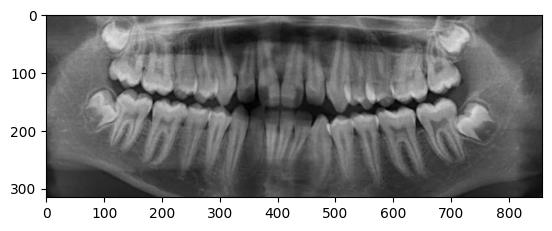

after grayscale


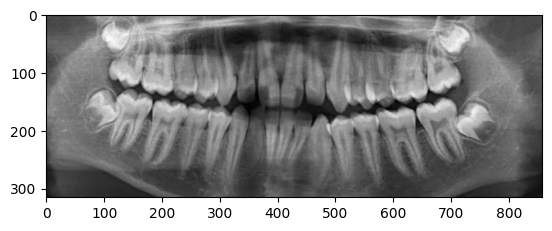

In [ ]:
#converting to grayscale image
#importing required modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#function using np.dot()
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
#read the original image
img_rgb = mpimg.imread('Test2.jpeg')
plt.imshow(img_rgb)
#display the original image
plt.show()

#converting the image to monochrome
print("after grayscale")
img_gray = rgb2gray(img_rgb)
plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
plt.savefig('gray_resultxray1.jpg')
#display the black and white image

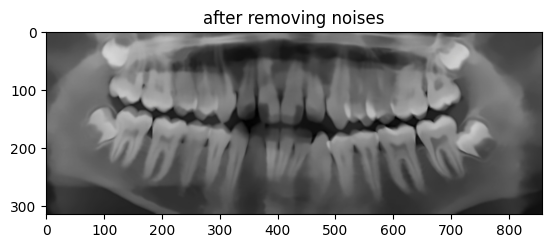

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
try:
  img = cv2.imread('Test2.jpeg')

  dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

#plt.subplot(121),plt.imshow(img)
#plt.subplot(122),plt.imshow(dst)
  cv2.imwrite('noiseresult1.jpg',dst)
except IOError:
  print('error')


plt.title("after removing noises")
image=mpimg.imread("noiseresult1.jpg")
plt.imshow(image)
plt.show()

In [ ]:
!gdown 10y0uP8oH66oUluixejUvQSTGfxDbe6Aw

Downloading...
From (uriginal): https://drive.google.com/uc?id=10y0uP8oH66oUluixejUvQSTGfxDbe6Aw
From (redirected): https://drive.google.com/uc?id=10y0uP8oH66oUluixejUvQSTGfxDbe6Aw&confirm=t&uuid=67ff60fa-4cfa-457e-9734-e5ae394a906b
To: /content/dataset.zip
100% 330M/330M [00:03<00:00, 97.2MB/s]


In [ ]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
   creating: dataset/
  inflating: dataset/DentalPanoramicXrays.zip  
  inflating: dataset/custom_masks.zip  


In [ ]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-tqaxbizz
  Running command git clone --filter=blob:none --quiet https://github.com/albu/albumentations /tmp/pip-req-build-tqaxbizz
  Resolved https://github.com/albu/albumentations to commit e3b47b3a127f92541cfeb16abbb44a6f8bf79cc8
  Preparing metadata (setup.py) ... done
  Created wheel for albumentations: filename=albumentations-1.3.1-py3-none-any.whl size=125700 sha256=c735a1d44366c965cad361c40c4d83090f534aee0582a615e6005aef08760dcc
  Stored in directory: /tmp/pip-ephem-wheel-cache-pff1t58a/wheels/3c/df/16/b3d0d64428c9f25b1ab03989a2e574546d3336647946d31e56
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [ ]:
from zipfile import ZipFile
path = '/content/dataset'



In [ ]:
import os
import numpy as np
from PIL import Image
from zipfile import ZipFile
from natsort import natsorted


def convert_one_channel(img):
    #some images have 3 channels , although they are grayscale image
    if len(img.shape)>2:
        img=img[:,:,0]
        return img
    else:
        return img

def pre_images(resize_shape,path,include_zip):
    if include_zip==True:
        ZipFile(path+"/DentalPanoramicXrays.zip").extractall(path)
        path=path+'/Images/'
    dirs=natsorted(os.listdir(path))
    sizes=np.zeros([len(dirs),2])
    images=img=Image.open(path+dirs[0])
    sizes[0,:]=images.size
    images=(images.resize((resize_shape),Image.ANTIALIAS))
    images=convert_one_channel(np.asarray(images))
    for i in range (1,len(dirs)):
        img=Image.open(path+dirs[i])
        sizes[i,:]=img.size
        img=img.resize((resize_shape),Image.ANTIALIAS)
        img=convert_one_channel(np.asarray(img))
        images=np.concatenate((images,img))
    images=np.reshape(images,(len(dirs),resize_shape[0],resize_shape[1],1))
    return images,sizes

X,X_sizes=pre_images((512,512),path,True)

In [ ]:
import os
import sys
import numpy as np
from PIL import Image
from zipfile import ZipFile
from natsort import natsorted
script_dir=path
default_path=script_dir+'/Original_Masks/'

def convert_one_channel(img):
    #some images have 3 channels , although they are grayscale image
    if len(img.shape)>2:
        img=img[:,:,0]
        return img
    else:
        return img
default_path=script_dir+'/Custom_Masks/'
def pre_splitted_masks(path=default_path):
    ZipFile(path+"/custom_masks.zip").extractall(path+'/Masks/')
    path=path+'/Masks/'
    dirs=natsorted(os.listdir(path))
    masks=img=Image.open(path+dirs[0])
    masks=convert_one_channel(np.asarray(masks))
    for i in range (1,len(dirs)):
        img=Image.open(path+dirs[i])
        img=convert_one_channel(np.asarray(img))
        masks=np.concatenate((masks,img))
    masks=np.reshape(masks,(len(dirs),512,512,1))
    return masks
Y=pre_splitted_masks(path='/content/dataset')

In [ ]:
X=np.float32(X/255)
Y=np.float32(Y/255)
x_train=X[:105,:,:,:]
y_train=Y[:105,:,:,:]
x_test=X[105:,:,:,:]
y_test=Y[105:,:,:,:]

In [ ]:
import cv2

import albumentations as A
aug = A.Compose([
    A.OneOf([A.RandomCrop(width=512, height=512),A.PadIfNeeded(min_height=512, min_width=512, p=0.5)],p=0.4),
    A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25,p=0.5),
    A.Compose([A.RandomScale(scale_limit=(-0.15, 0.15), p=1, interpolation=1),
                            A.PadIfNeeded(512, 512, border_mode=cv2.BORDER_CONSTANT),
                            A.Resize(512, 512, cv2.INTER_NEAREST), ],p=0.5),
    A.ShiftScaleRotate (shift_limit=0.325, scale_limit=0.15, rotate_limit=15,border_mode=cv2.BORDER_CONSTANT, p=1),
    A.Rotate(15,p=0.5),
    A.Blur(blur_limit=1, p=0.5),
    A.Downscale(scale_min=0.15, scale_max=0.25,  always_apply=False, p=0.5),
    A.GaussNoise(var_limit=(0.05, 0.1), mean=0, per_channel=True, always_apply=False, p=0.5),
    A.HorizontalFlip(p=0.25),
])

x_train1=np.copy(x_train)
y_train1=np.copy(y_train)
count=0
while(count<4):
  x_aug2=np.copy(x_train1)
  y_aug2=np.copy(y_train1)
  for i in range(len(x_train1)):
    augmented=aug(image=x_train1[i,:,:,:],mask=y_train1[i,:,:,:])
    x_aug2[i,:,:,:]= augmented['image']
    y_aug2[i,:,:,:]= augmented['mask']
  x_train=np.concatenate((x_train,x_aug2))
  y_train=np.concatenate((y_train,y_aug2))
  if count == 9:
    break
  count += 1
del x_aug2
del X
del Y
del y_aug2
del y_train1
del x_train1
del augmented
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,104)
print(random_number)

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1692: UserWarning: Using default interpolation INTER_NEAREST, which is sub-optimal.Please specify interpolation mode for downscale and upscale explicitly.For additional information see this PR https://github.com/albumentations-team/albumentations/pull/584
  warnings.warn(


77


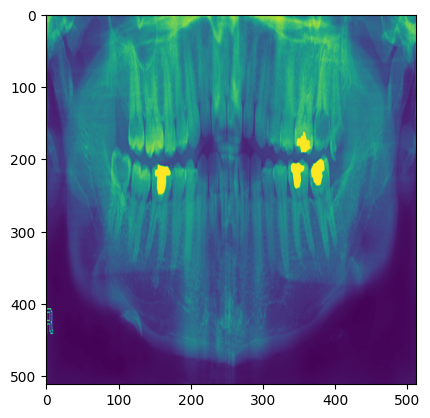

In [ ]:
plt.imshow(x_train[random_number,:,:,0])

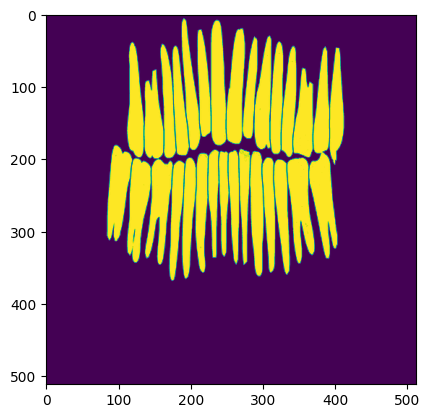

In [ ]:

plt.imshow(y_train[random_number,:,:,0])